In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/retail_sales_dataset.csv')

## EDA

In [130]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [131]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Data Cleaning and Handling Missing Values

In [133]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [134]:
df['Customer ID'].duplicated(keep=False).sum()

0

## Feature Engineering

In [167]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

In [168]:
df.head()

,Transaction ID,Date,Customer ID,Age,Product Category,Quantity,Price per Unit,Total Amount,Gender_Male
0,1,2023-11-24,CUST001,34,Beauty,3,50,150,1
1,2,2023-02-27,CUST002,26,Clothing,2,500,1000,0
2,3,2023-01-13,CUST003,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,37,Clothing,1,500,500,1
4,5,2023-05-06,CUST005,30,Beauty,2,50,100,1


In [169]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [170]:
df = pd.get_dummies(df, columns=['Product Category'], drop_first=True, dtype=int)

In [171]:
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,1,0,0
1,2,2023-02-27,CUST002,26,2,500,1000,0,1,0
2,3,2023-01-13,CUST003,50,1,30,30,1,0,1
3,4,2023-05-21,CUST004,37,1,500,500,1,1,0
4,5,2023-05-06,CUST005,30,2,50,100,1,0,0


In [172]:
TotalSales = df['Quantity'] * df['Price per Unit']

In [173]:
type(TotalSales)

pandas.core.series.Series

In [174]:
df['Total Sales'] = TotalSales

In [175]:
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Male,Product Category_Clothing,Product Category_Electronics,Total Sales
0,1,2023-11-24,CUST001,34,3,50,150,1,0,0,150
1,2,2023-02-27,CUST002,26,2,500,1000,0,1,0,1000
2,3,2023-01-13,CUST003,50,1,30,30,1,0,1,30
3,4,2023-05-21,CUST004,37,1,500,500,1,1,0,500
4,5,2023-05-06,CUST005,30,2,50,100,1,0,0,100


## Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X = df.drop(['Transaction ID', 'Date', 'Customer ID', 'Total Amount', 'Total Sales'], axis=1)

In [178]:
X.head()

,Age,Quantity,Price per Unit,Gender_Male,Product Category_Clothing,Product Category_Electronics
0,34,3,50,1,0,0
1,26,2,500,0,1,0
2,50,1,30,1,0,1
3,37,1,500,1,1,0
4,30,2,50,1,0,0


In [179]:
y = df['Total Amount']

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Training the Model

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
model = LinearRegression()

In [185]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speedu

In [186]:
model.fit(scaled_X_train, y_train)

LinearRegression()

In [187]:
# Display the coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 460.94285714285706
Coefficients: [-1.68371376e+01  2.08198905e+02  4.77075344e+02  1.02894969e+00
 -4.99281661e+00 -2.81975202e-01]


## Making Predictions

In [188]:
pred = model.predict(scaled_X_test)

# Display the first 5 actual vs predicted values
predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': pred})
predictions_df.head()

,Actual Sales,Predicted Sales
521,1500,1344.839626
737,100,39.350740
740,300,466.243119
660,100,341.064392
411,2000,1560.373132


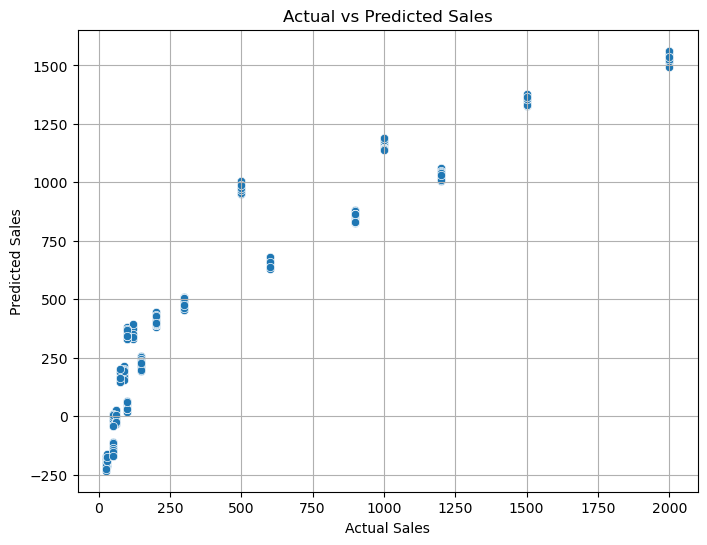

In [189]:
# Scatter plot of actual vs predicted sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid()
plt.show()

In [190]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [191]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [192]:
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5  # Taking square root
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")  # Higher is better (range: -∞ to 1)

MSE: 40664.51966507227
RMSE: 201.65445610021186
MAE: 171.10061672193405
R² Score: 0.854526622848494


## --------

In [60]:
X = df[['Quantity', 'Price per Unit']]

In [61]:
y = df['Total Sales']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
pred = model.predict(X_test)

In [65]:
# Display the first 5 actual vs predicted values
predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': pred})
predictions_df.head()

,Actual Sales,Predicted Sales
521,1500,1346.329957
737,100,43.368088
740,300,479.482158
660,100,351.227193
411,2000,1531.314437


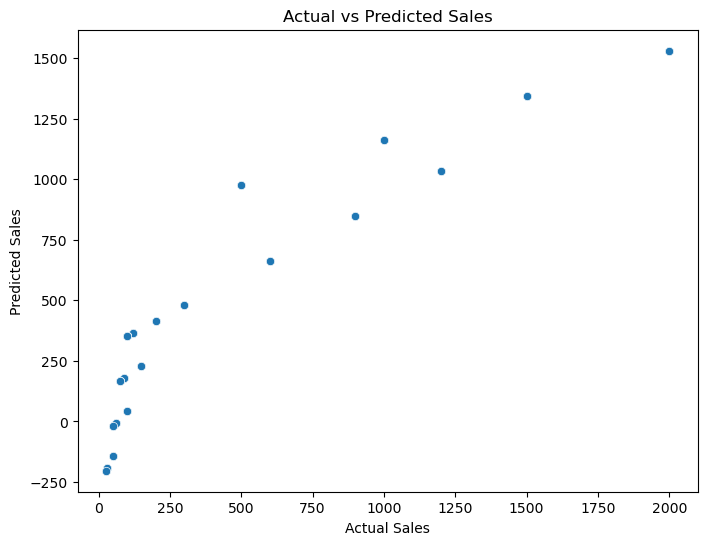

In [67]:
# Scatter plot of actual vs predicted sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


# -------------

In [69]:
df = pd.get_dummies(df, columns=['Gender'], dtype=int)

In [70]:
df = pd.get_dummies(df, columns=['Product Category'], dtype=int)

In [71]:
df.head()

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,0,1,1,0,0
1,2,2023-02-27,CUST002,26,2,500,1000,1,0,0,1,0
2,3,2023-01-13,CUST003,50,1,30,30,0,1,0,0,1
3,4,2023-05-21,CUST004,37,1,500,500,0,1,0,1,0
4,5,2023-05-06,CUST005,30,2,50,100,0,1,1,0,0


# Decision Tree

## Feature Engineering

In [256]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

In [257]:
df = pd.get_dummies(df, columns=['Product Category'], drop_first=True, dtype=int)

## Train Test Split

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X = df.drop(['Transaction ID', 'Date', 'Customer ID', 'Total Amount'], axis=1)

In [233]:
y = df['Total Amount']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [325]:
model = DecisionTreeClassifier(max_depth=4)

In [326]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [327]:
base_pred = model.predict(X_test)
base_pred

array([1500,  100,  500,  100, 2000,   90,   50,  500,  200, 1000,  100,
        100, 1000,   50,  500,  100, 2000,  100,   50, 1200,  900,  100,
       1500,  100, 1500,   25,   50,  900,  200,  100,   25,   50,  100,
        100,   25, 1500,  100,   25,   50,  150,  100, 1000, 1500,  200,
        200,  100,  500,  500, 1000, 1000,   50, 1000,   90,   50,  500,
       1200,   50,  100,   90,  500, 1000,   90, 1000,  200, 1000, 1500,
       1200,  500,  100,   25,  100,  200,  100, 2000,   90, 1000,  100,
         50,  900, 1200,  900, 1200,  100,  500,  500,  100,  150,  100,
        100,  100,   90, 1500,  500,   90,  900, 1200,  200, 2000,  100,
        900], dtype=int64)

## Evaluation

In [328]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [329]:
y_test.shape

(100,)

In [330]:
base_pred.shape

(100,)

In [331]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         5
          30       0.00      0.00      0.00         3
          50       0.70      1.00      0.82         7
          60       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         5
          90       0.57      1.00      0.73         4
         100       0.68      1.00      0.81        17
         120       0.00      0.00      0.00         3
         150       1.00      1.00      1.00         2
         200       1.00      1.00      1.00         7
         300       0.00      0.00      0.00         9
         500       0.18      1.00      0.31         2
         600       0.00      0.00      0.00         5
         900       1.00      1.00      1.00         6
        1000       0.50      1.00      0.67         5
        1200       1.00      1.00      1.00         6
        1500       1.00      1.00      1.00         7
        2000       1.00    

C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [332]:
from sklearn.tree import plot_tree

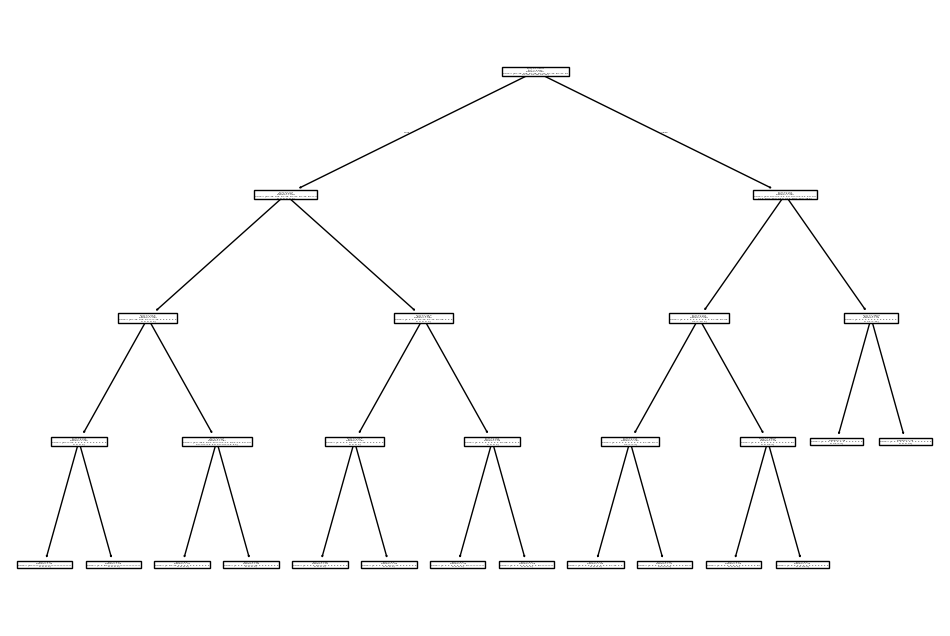

In [333]:
plt.figure(figsize=(12,8))
plot_tree(model);

In [334]:
from sklearn.metrics import accuracy_score

In [335]:
y_pred = model.predict(X_test)

In [336]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.72


## Grid Search

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [260]:
from sklearn.model_selection import GridSearchCV

In [266]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [267]:
dtree = DecisionTreeClassifier(random_state=42)

In [268]:
full_cv_classifier = GridSearchCV(dtree,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [269]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [270]:
full_cv_classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}